In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cardiovascular-disease-dataset/cardio_train.csv


In [3]:
df = pd.read_csv('/kaggle/input/cardiovascular-disease-dataset/cardio_train.csv', sep=';')
df.head ()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0



**Inspect data for Null, Columns, Duplicates, and Basic statistics of data distribution**

In [4]:
df.columns

Index(['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')

In [5]:
df.shape

(70000, 13)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [7]:
df.isna().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [8]:
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


**INSIGHTS FROM THE DESCRIPTION ABOVE**
* Minimum values of systolic and diastolic bp shouldn't be negative
* Maximum valus shouln't be up to 16020 and 11000 respectively

In [9]:
df.duplicated().sum()

0

In [10]:
df.nunique()

id             70000
age             8076
gender             2
height           109
weight           287
ap_hi            153
ap_lo            157
cholesterol        3
gluc               3
smoke              2
alco               2
active             2
cardio             2
dtype: int64

Features:

Age | Objective Feature | age | int (days) Height | Objective Feature | height | int (cm) | Weight | Objective Feature | weight | float (kg) | Gender | Objective Feature | gender | categorical code | Systolic blood pressure | Examination Feature | ap_hi | int | Diastolic blood pressure | Examination Feature | ap_lo | int | Cholesterol | Examination Feature | cholesterol | 1: normal, 2: above normal, 3: well above normal | Glucose | Examination Feature | gluc | 1: normal, 2: above normal, 3: well above normal | Smoking | Subjective Feature | smoke | binary | Alcohol intake | Subjective Feature | alco | binary | Physical activity | Subjective Feature | active | binary | Presence or absence of cardiovascular disease | Target Variable | cardio | binary |

Refer to df.head() above for better interpretation

In [11]:
df['age_years'] = df['age']/365
# Then use y='age_years' in violinplot

In [12]:
# import visaulization libraries
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

using histogram and KDE

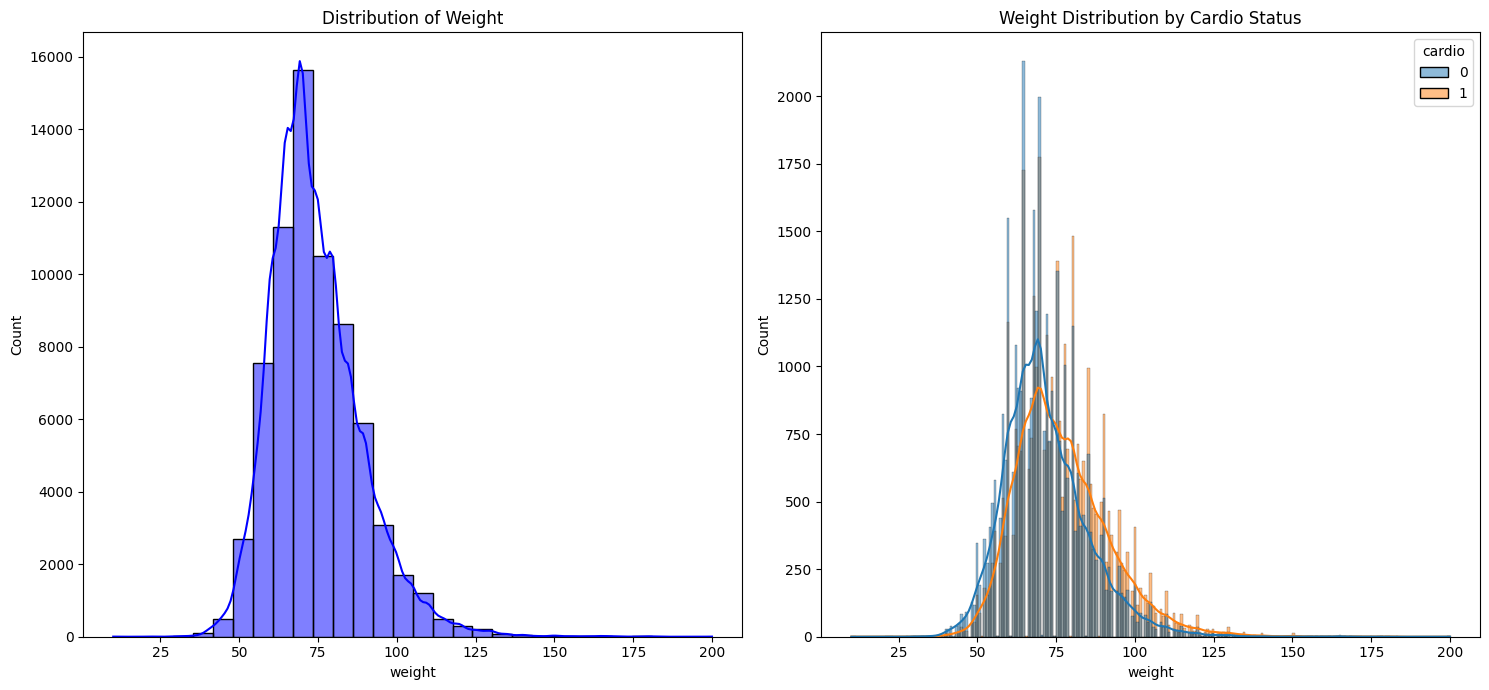

In [13]:

# Create a 1x2 subplot grid
fig, axs = plt.subplots(1, 2, figsize=(15, 7))

# Plot 1: Histogram of weight (green)
sns.histplot(data=df, x='weight', bins=30, kde=True, color='b', ax=axs[0])
axs[0].set_title('Distribution of Weight')

# Plot 2: Weight distribution by cardio class (hue)
sns.histplot(data=df, x='weight', kde=True, hue='cardio', ax=axs[1])
axs[1].set_title('Weight Distribution by Cardio Status')

plt.tight_layout()  # Prevents overlapping labels
plt.show()

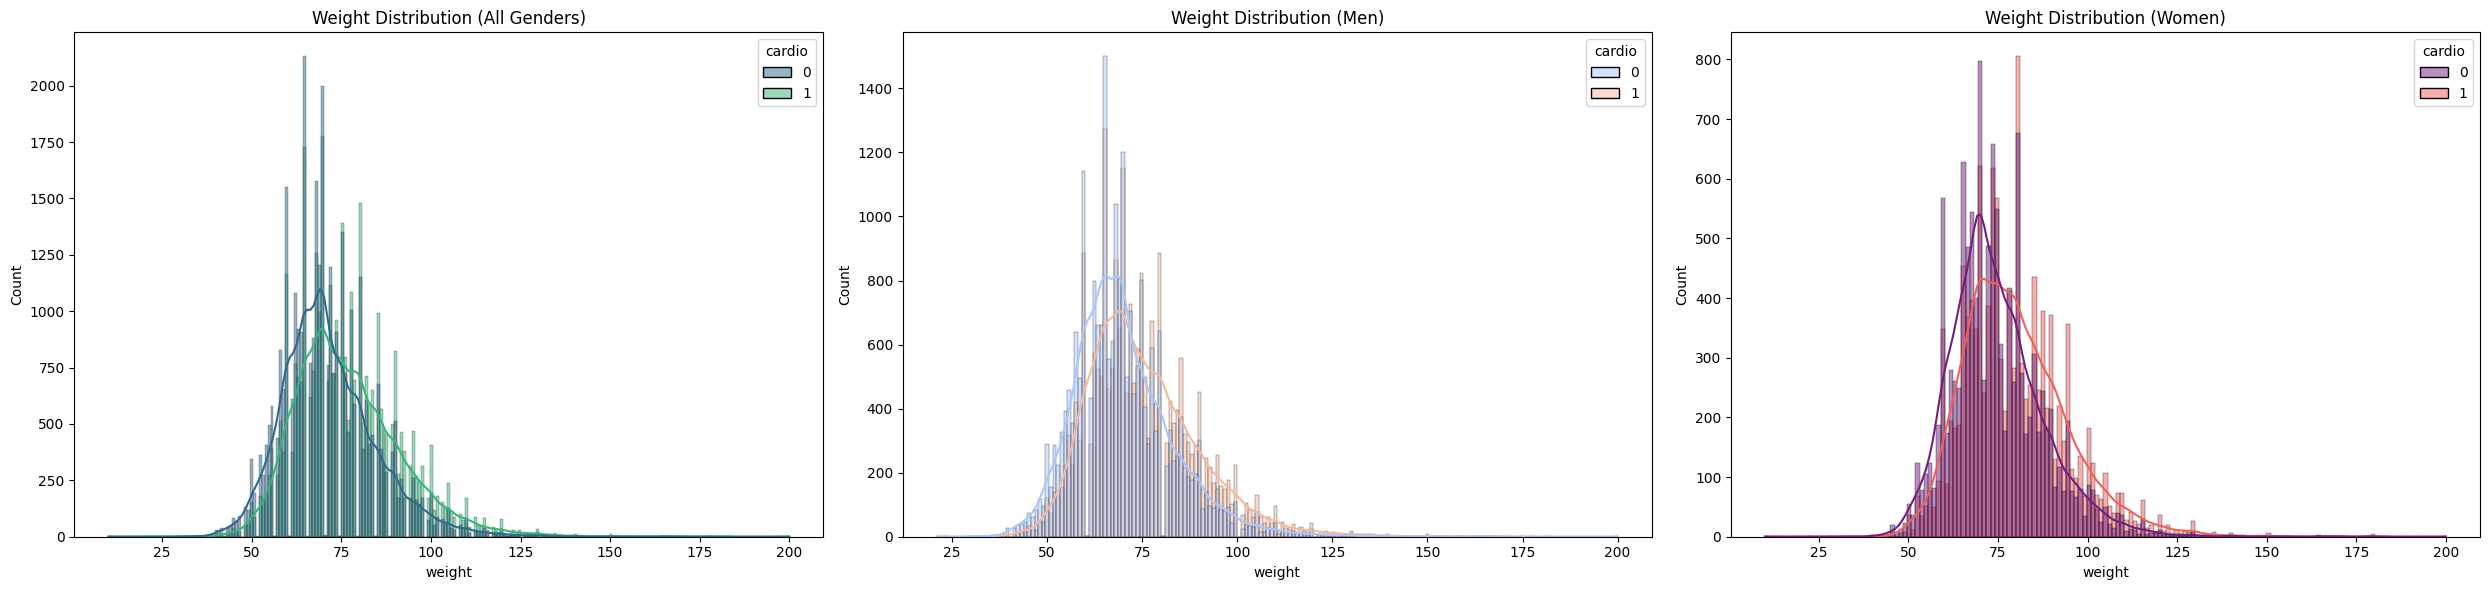

In [14]:
plt.figure(figsize=(25, 6))  # Set overall figure size

# Subplot 1: All Genders
plt.subplot(1, 3, 1)  # 1 row, 3 cols, position 1
sns.histplot(data=df, x='weight', kde=True, hue='cardio', palette='viridis')
plt.title('Weight Distribution (All Genders)')

# Subplot 2: Gender = 1 (Men)
plt.subplot(1, 3, 2)  # Position 2
sns.histplot(data=df[df['gender'] == 1], x='weight', kde=True, hue='cardio', palette='coolwarm')
plt.title('Weight Distribution (Men)')

# Subplot 3: Gender = 2 (Women)
plt.subplot(1, 3, 3)  # Position 3
sns.histplot(data=df[df['gender'] == 2], x='weight', kde=True, hue='cardio', palette='magma')
plt.title('Weight Distribution (Women)')

plt.tight_layout()  # Prevent overlapping
plt.show()

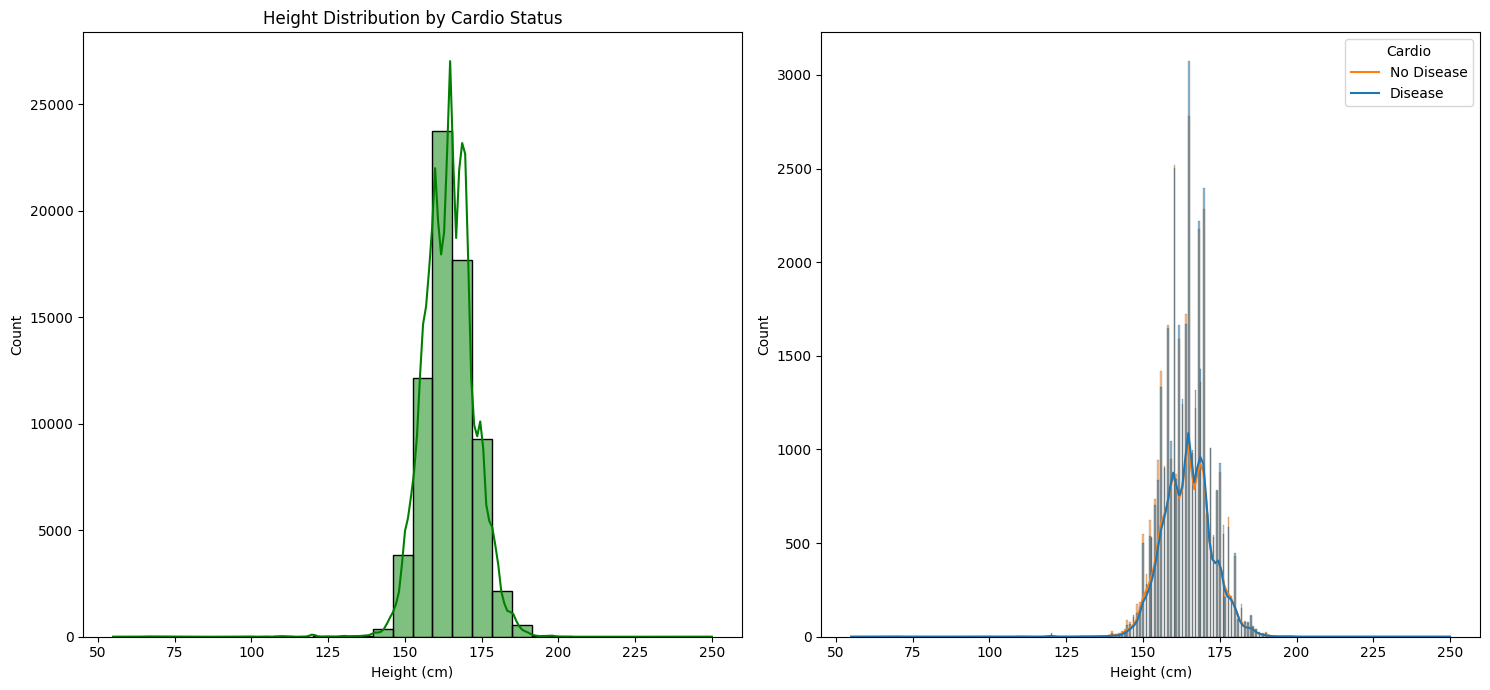

In [15]:
# 1. Create a 1x2 subplot grid and set figure size
fig, axs = plt.subplots(1, 2, figsize=(15, 7))

# 2. First subplot: Height distribution (all patients)
sns.histplot(data=df, x='height', bins=30, kde=True, color='g', ax=axs[0])
axs[0].set_title('Height Distribution (All Patients)')
axs[0].set_xlabel('Height (cm)')

# 3. Second subplot: Height distribution by cardio status
sns.histplot(data=df, x='height', kde=True, hue='cardio', ax=axs[1])
axs[0].set_title('Height Distribution by Cardio Status')
axs[1].set_xlabel('Height (cm)')
axs[1].legend(title='Cardio', labels=['No Disease', 'Disease'])

# 4. Adjust layout and display
plt.tight_layout()
plt.show()

**Insights**

* Higher weight is associated with cardiovascular diseases, and simalr for all genders
* Height does not influence incidence of cardiovascular diseases

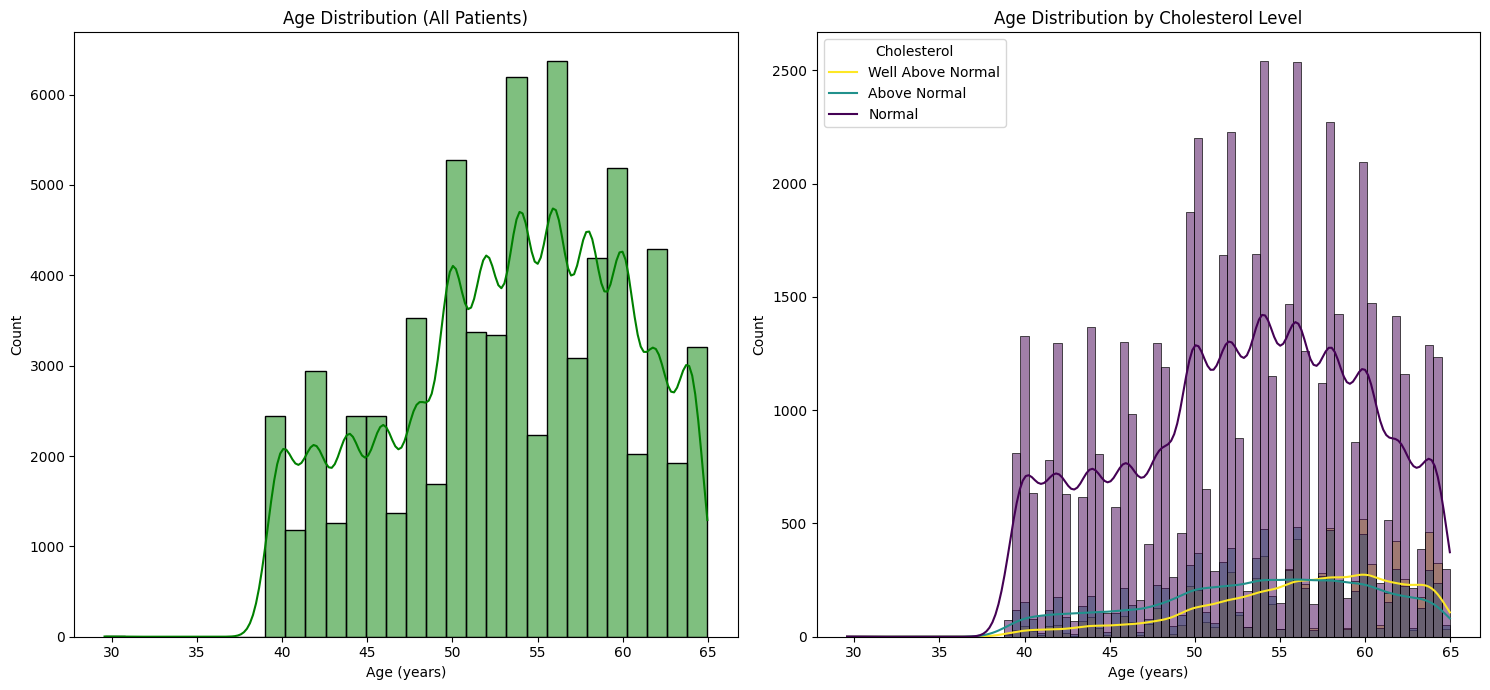

In [16]:

#Converting age in days to years
age_years = df['age']/365
# Create figure and subplot grid (1 row, 2 columns)
fig, axs = plt.subplots(1, 2, figsize=(15, 7))

# First subplot: Age distribution (all patients)
sns.histplot(data=df, x='age_years', bins=30, kde=True, color='g', ax=axs[0])
axs[0].set_title('Age Distribution (All Patients)')
axs[0].set_xlabel('Age (years)')

# Second subplot: Age distribution by cholesterol level
sns.histplot(data=df, x='age_years', kde=True, hue='cholesterol', palette='viridis', ax=axs[1])
axs[1].set_title('Age Distribution by Cholesterol Level')
axs[1].set_xlabel('Age (years)')
axs[1].legend(title='Cholesterol', 
             labels=['Well Above Normal', 'Above Normal', 'Normal'])

# Adjust layout and display
plt.tight_layout()
plt.show()

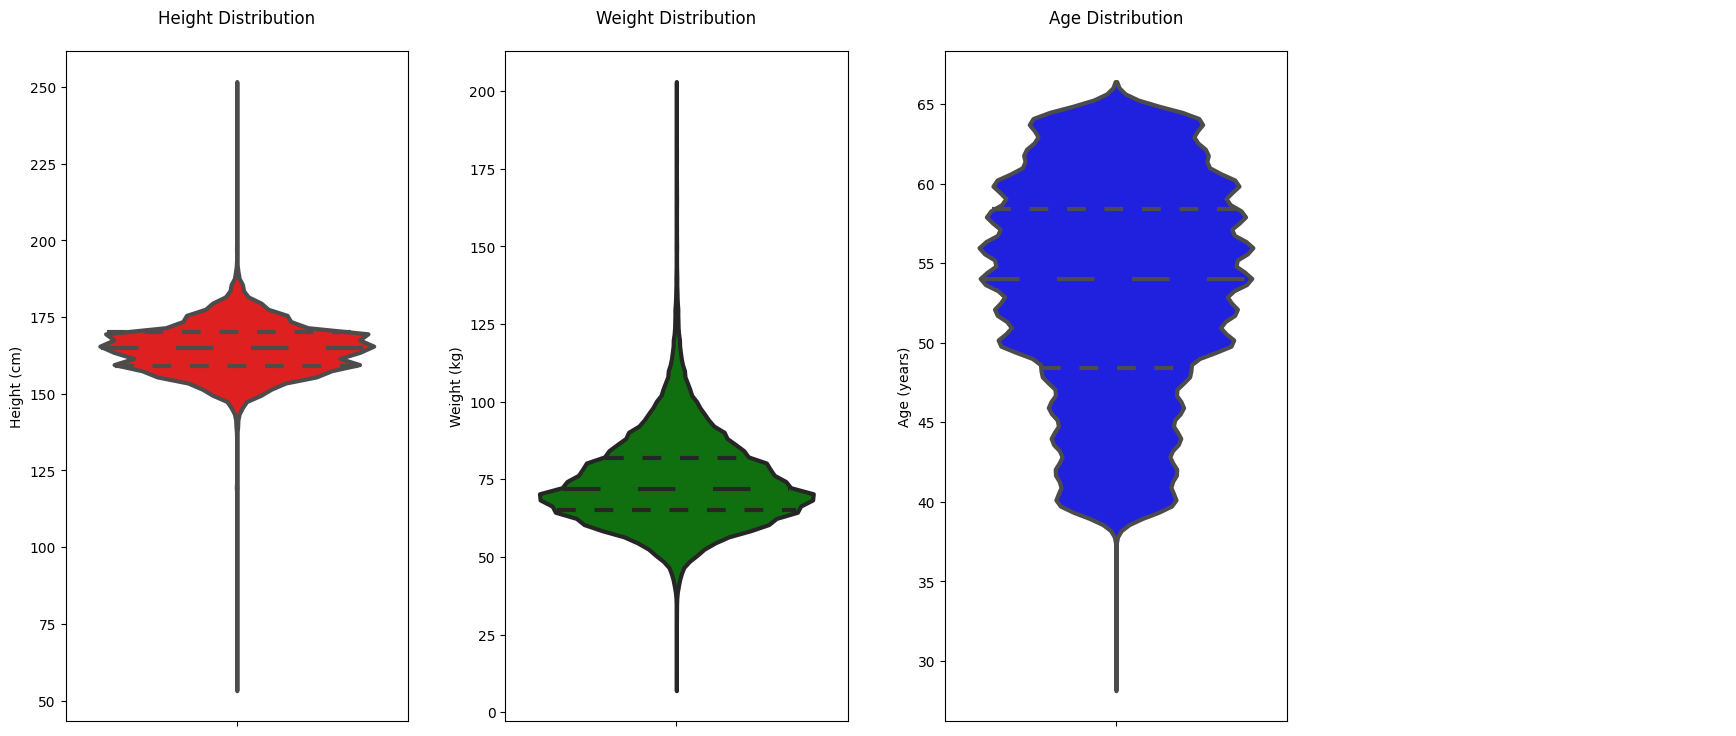

In [17]:
# Set up the figure and subplots
plt.figure(figsize=(18, 8))
#Converting age in days to years
age_years = df['age']/365

# 1. Height Violin Plot
plt.subplot(1, 4, 1)
sns.violinplot(y='height', data=df, color='red', linewidth=3, inner='quartile')
plt.title('Height Distribution', fontsize=12, pad=20)
plt.ylabel('Height (cm)', fontsize=10)

# 2. Weight Violin Plot
plt.subplot(1, 4, 2)
sns.violinplot(y='weight', data=df, color='green', linewidth=3, inner='quartile')
plt.title('Weight Distribution', fontsize=12, pad=20)
plt.ylabel('Weight (kg)', fontsize=10)

# 3. Age Violin Plot
plt.subplot(1, 4, 3)
sns.violinplot(y='age_years', data=df, color='blue', linewidth=3, inner='quartile')
plt.title('Age Distribution', fontsize=12, pad=20)
plt.ylabel('Age (years)', fontsize=10)

# 4. Empty subplot for legend/space
plt.subplot(1, 4, 4)
plt.axis('off')  # Hide axes for the empty subplot

# Adjust layout and display
plt.tight_layout(pad=3)
plt.show()

**Insight:**

* most of the height lies between 140 and 185
* most of the weight lies between 40 and 115
* most of the ages lies between 38 and 68 years


**FEATURE ENGINEERING**


Handling skewed data and outliers

In [18]:
# separate categorical data from numerical data
category = ['gender', 'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio']
cat_data = df[category]
cat_data

,gender,cholesterol,gluc,smoke,alco,active,cardio
0,2,1,1,0,0,1,0
1,1,3,1,0,0,1,1
2,1,3,1,0,0,0,1
3,2,1,1,0,0,1,1
4,1,1,1,0,0,0,0
...,...,...,...,...,...,...,...
69995,2,1,1,1,0,1,0
69996,1,2,2,0,0,1,1
69997,2,3,1,0,1,0,1
69998,1,1,2,0,0,0,1


In [19]:
# We create an dataframe to add and test run our new features
numeric = ['age', 'height', 'weight','ap_hi', 'ap_lo']
num_data = df[numeric]
num_data

,age,height,weight,ap_hi,ap_lo
0,18393,168,62.0,110,80
1,20228,156,85.0,140,90
2,18857,165,64.0,130,70
3,17623,169,82.0,150,100
4,17474,156,56.0,100,60
...,...,...,...,...,...
69995,19240,168,76.0,120,80
69996,22601,158,126.0,140,90
69997,19066,183,105.0,180,90
69998,22431,163,72.0,135,80


**View your numerical data and create normally distributed dataset**

In [20]:
# create the list of numeric columns
subjective = ['age', 'height', 'weight']

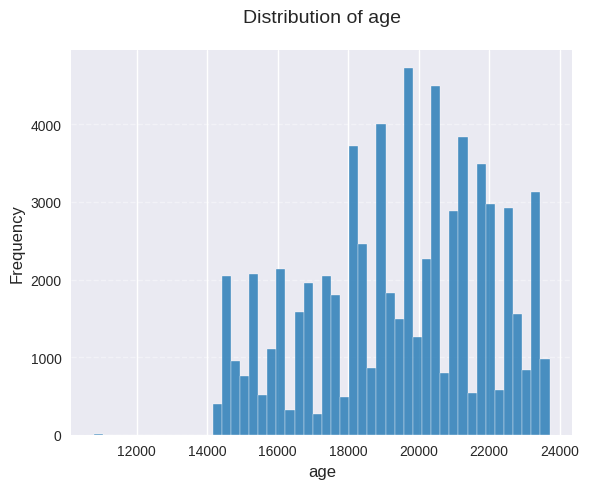

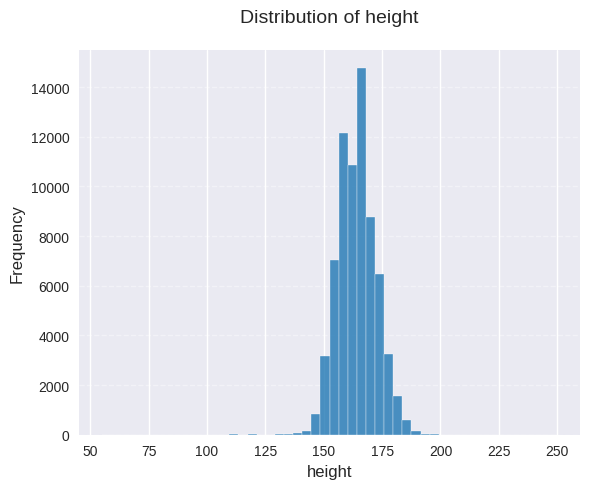

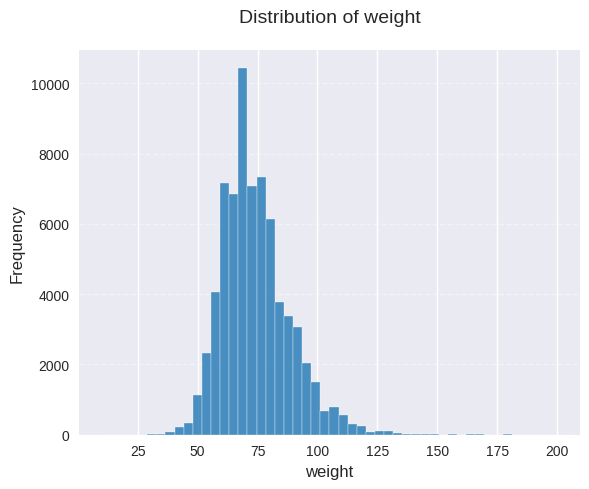

In [21]:
import matplotlib.pyplot as plt

# Set style for better visuals
plt.style.use('seaborn')

# Loop through columns and plot
for col in subjective:
    # Create figure with adjusted size
    plt.figure(figsize=(6, 5))
    
    # Plot histogram with customization
    plt.hist(num_data[col], 
             bins=50,
             color='#1f77b4',  # Matplotlib default blue
             edgecolor='white',
             alpha=0.8)
    
    # Add labels and title
    plt.title(f'Distribution of {col}', fontsize=14, pad=20)
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    
    # Add grid and adjust layout
    plt.grid(axis='y', linestyle='--', alpha=0.4)
    plt.tight_layout()
    
    plt.show()

**Insight**

* The height is normally ditributed
* The weight is slightly skewed to the right
* The Age is normal



**Previously, we found out that there are some large vaLues in ap_hi and ap_lo columns and also negative values. Now, we need to handle it.**

In [22]:
# check columns with negative values of ap_hi (diastole)
num_data[num_data['ap_hi'] < 0]

,age,height,weight,ap_hi,ap_lo
4607,15281,165,78.0,-100,80
16021,22108,161,90.0,-115,70
20536,15581,153,54.0,-100,70
23988,18301,162,74.0,-140,90
25240,14711,168,50.0,-120,80
35040,23325,168,59.0,-150,80
46627,23646,160,59.0,-120,80


In [23]:
# change all the negative values to positive
for values in range(0, len(num_data)):
    if num_data['ap_hi'][values] < 0:
        num_data['ap_hi'][values] = num_data['ap_hi'][values] * -1

# check if we still have negative values
num_data[num_data['ap_hi'] < 0]

,age,height,weight,ap_hi,ap_lo


In [24]:
# check columns with negative values of ap_lo (systole)
num_data[num_data['ap_lo'] < 0]

,age,height,weight,ap_hi,ap_lo
60106,22571,167,74.0,15,-70


In [25]:
# change all the negative values to positive
for values in range(0, len(num_data)):
    if num_data['ap_lo'][values] < 0:
        num_data['ap_lo'][values] = num_data['ap_lo'][values] * -1

# check if we still have negative values
num_data[num_data['ap_lo'] < 0]

,age,height,weight,ap_hi,ap_lo


**Handle outliers with IQR (interquatile range)**

In [26]:
# calculate interquartile range
Q1 = num_data.quantile(0.25)
Q3 = num_data.quantile(0.75)
IQR = Q3 -Q1
IQR

age       3663.0
height      11.0
weight      17.0
ap_hi       20.0
ap_lo       10.0
dtype: float64

In [27]:
# Get outliers
upper = (num_data > (Q3 + 1.5*IQR))
lower = (num_data < (Q1 - 1.5*IQR))
outliers = upper | lower
outliers.sum()

age          4
height     519
weight    1819
ap_hi     1428
ap_lo     4631
dtype: int64

In [28]:
# Iterate through Q1, Q3 values and column names simultaneously
for Q1, Q3, column in zip(Q1, Q3, num_data.columns):
    
    # Calculate IQR (Interquartile Range)
    IQR = Q3 - Q1
    
    # Cap upper outliers: Values > Q3 + 1.5*IQR are set to Q3 + 1.5*IQR
    num_data.loc[(num_data[column] > (Q3 + 1.5*IQR)), column] = Q3 + 1.5*IQR
    
    # Cap lower outliers: Values < Q1 - 1.5*IQR are set to Q1 - 1.5*IQR
    num_data.loc[(num_data[column] < (Q1 - 1.5*IQR)), column] = Q1 - 1.5*IQR

# Return the modified DataFrame with capped outliers
num_data

,age,height,weight,ap_hi,ap_lo
0,18393.0,168.0,62.0,110,80
1,20228.0,156.0,85.0,140,90
2,18857.0,165.0,64.0,130,70
3,17623.0,169.0,82.0,150,100
4,17474.0,156.0,56.0,100,65
...,...,...,...,...,...
69995,19240.0,168.0,76.0,120,80
69996,22601.0,158.0,107.5,140,90
69997,19066.0,183.0,105.0,170,90
69998,22431.0,163.0,72.0,135,80


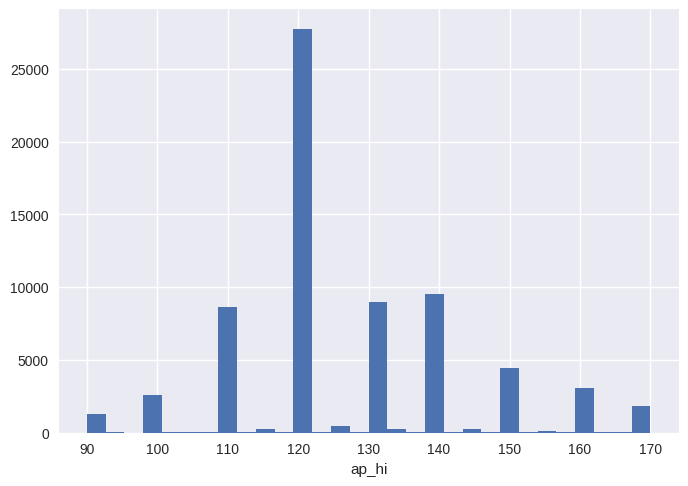

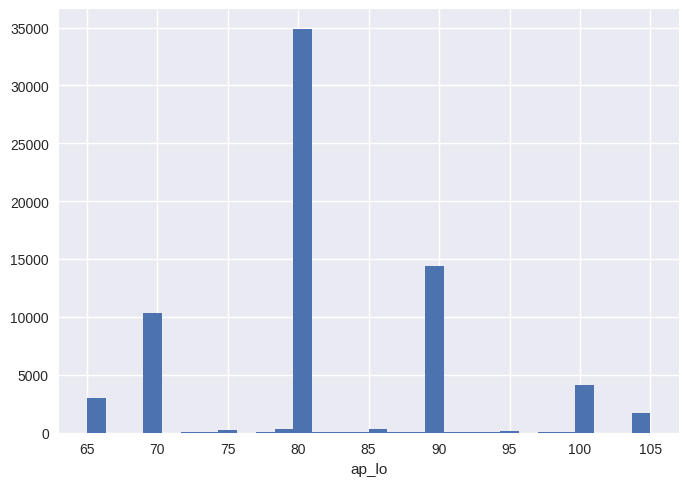

In [29]:
bp = ['ap_hi', 'ap_lo']
for columns in bp:
    plt.hist(num_data[columns], bins=30)
    plt.xlabel(columns)
    plt.show()

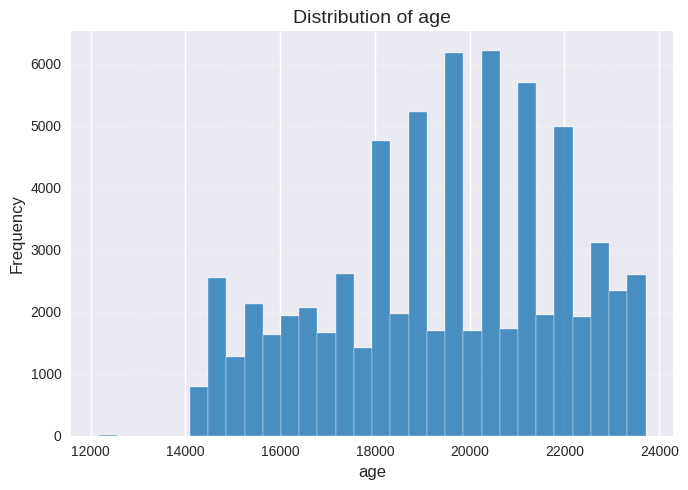

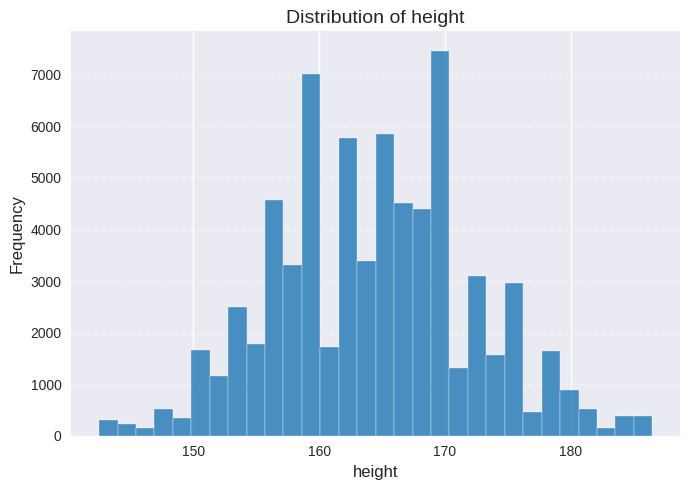

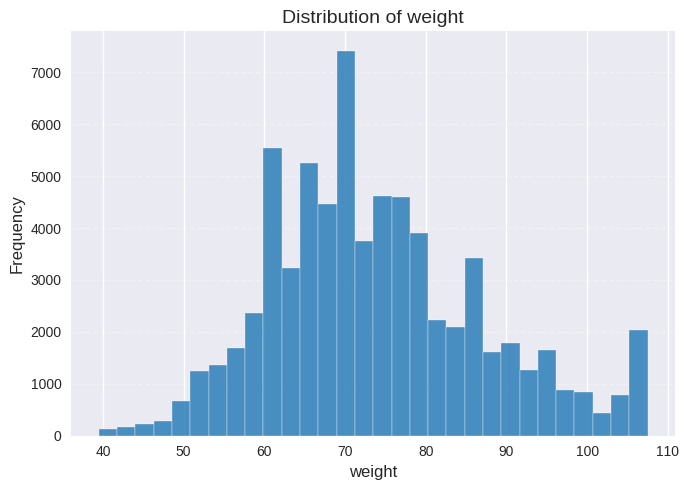

In [30]:
import matplotlib.pyplot as plt

# Set style for better visuals
plt.style.use('seaborn')

# Loop through columns
for col in subjective:
    # Create figure
    plt.figure(figsize=(7, 5))
    
    # Create histogram with customizations
    plt.hist(num_data[col], 
             bins=30,
             color='#1f77b4',  # Nice blue color
             edgecolor='white', # White edges on bars
             alpha=0.8)        # Slight transparency
    
    # Add labels and title
    plt.title(f'Distribution of {col}', fontsize=14)
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    
    # Add grid lines
    plt.grid(axis='y', alpha=0.3, linestyle='--')
    
    # Adjust layout and display
    plt.tight_layout()
    plt.show()

In [31]:
# Add new features using vectorized operations (more efficient than loops)
num_data['bmi'] = num_data['weight'] / (num_data['height']/100)**2
num_data['age_year'] = num_data['age'] / 365

# Hypertensive stage classification
conditions = [
    (num_data['ap_hi'] > 180) | (num_data['ap_lo'] > 120),
    (num_data['ap_hi'] > 139) | (num_data['ap_lo'] > 90),
    (num_data['ap_hi'] > 129) | (num_data['ap_lo'] > 80),
    (num_data['ap_hi'] > 119),
    True  # Default case
]
choices = [4, 3, 2, 1, 0]
num_data['hypertensive'] = np.select(conditions, choices)

# Age group classification
age_bins = [0, 15, 20, 40, 60, float('inf')]
age_labels = ['children', 'teenager', 'youth', 'middle_age', 'elderly']
num_data['age_group'] = pd.cut(num_data['age_year'], bins=age_bins, labels=age_labels)

# Obesity classification
bmi_bins = [0, 25, 30, 35, 40, float('inf')]
num_data['obesity'] = pd.cut(num_data['bmi'], bins=bmi_bins, labels=[0, 1, 2, 3, 4])

num_data

,age,height,weight,ap_hi,ap_lo,bmi,age_year,hypertensive,age_group,obesity
0,18393.0,168.0,62.0,110,80,21.967120,50.391781,0,middle_age,0
1,20228.0,156.0,85.0,140,90,34.927679,55.419178,3,middle_age,2
2,18857.0,165.0,64.0,130,70,23.507805,51.663014,2,middle_age,0
3,17623.0,169.0,82.0,150,100,28.710479,48.282192,3,middle_age,1
4,17474.0,156.0,56.0,100,65,23.011177,47.873973,0,middle_age,0
...,...,...,...,...,...,...,...,...,...,...
69995,19240.0,168.0,76.0,120,80,26.927438,52.712329,1,middle_age,1
69996,22601.0,158.0,107.5,140,90,43.062009,61.920548,3,elderly,4
69997,19066.0,183.0,105.0,170,90,31.353579,52.235616,3,middle_age,2
69998,22431.0,163.0,72.0,135,80,27.099251,61.454795,2,elderly,1


In [32]:
num_data['age_group'].unique()

['middle_age', 'elderly', 'youth']
Categories (5, object): ['children' < 'teenager' < 'youth' < 'middle_age' < 'elderly']

In [33]:
# encode the category in num_data
num_data = pd.get_dummies(num_data, dtype = int)
num_data

,age,height,weight,ap_hi,ap_lo,bmi,age_year,hypertensive,age_group_children,age_group_teenager,age_group_youth,age_group_middle_age,age_group_elderly,obesity_0,obesity_1,obesity_2,obesity_3,obesity_4
0,18393.0,168.0,62.0,110,80,21.967120,50.391781,0,0,0,0,1,0,1,0,0,0,0
1,20228.0,156.0,85.0,140,90,34.927679,55.419178,3,0,0,0,1,0,0,0,1,0,0
2,18857.0,165.0,64.0,130,70,23.507805,51.663014,2,0,0,0,1,0,1,0,0,0,0
3,17623.0,169.0,82.0,150,100,28.710479,48.282192,3,0,0,0,1,0,0,1,0,0,0
4,17474.0,156.0,56.0,100,65,23.011177,47.873973,0,0,0,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,19240.0,168.0,76.0,120,80,26.927438,52.712329,1,0,0,0,1,0,0,1,0,0,0
69996,22601.0,158.0,107.5,140,90,43.062009,61.920548,3,0,0,0,0,1,0,0,0,0,1
69997,19066.0,183.0,105.0,170,90,31.353579,52.235616,3,0,0,0,1,0,0,0,1,0,0
69998,22431.0,163.0,72.0,135,80,27.099251,61.454795,2,0,0,0,0,1,0,1,0,0,0


In [34]:
print(num_data.columns.tolist())


['age', 'height', 'weight', 'ap_hi', 'ap_lo', 'bmi', 'age_year', 'hypertensive', 'age_group_children', 'age_group_teenager', 'age_group_youth', 'age_group_middle_age', 'age_group_elderly', 'obesity_0', 'obesity_1', 'obesity_2', 'obesity_3', 'obesity_4']


In [35]:
print(cat_data.columns.tolist())


['gender', 'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio']


In [36]:
# Reload the original CSV
original_data = pd.read_csv('/kaggle/input/cardiovascular-disease-dataset/cardio_train.csv', sep=';')

# Verify gender column exists
if 'gender' in original_data.columns:
    cat_data['gender'] = original_data['gender']  # Add it back
    print("Gender column restored!")
else:
    print("Gender not found in original data - check column names")

Gender column restored!


In [37]:
print(cat_data.columns.tolist())

['gender', 'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio']


In [38]:
print(cat_data.columns.tolist())

['gender', 'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio']


In [39]:
print(cat_data.head(5))

   gender  cholesterol  gluc  smoke  alco  active  cardio
0       2            1     1      0     0       1       0
1       1            3     1      0     0       1       1
2       1            3     1      0     0       0       1
3       2            1     1      0     0       1       1
4       1            1     1      0     0       0       0


In [40]:
# 1. First check if gender column exists
if 'gender' in cat_data.columns:
    # 2. Convert numeric to labels (only if values are 1/2)
    cat_data['gender'] = cat_data['gender'].map({1: 'Female', 2: 'Male'})
    

    
else:
    print("Warning: 'gender' column not found - skipping processing")

# Show result
print(cat_data.head())

   gender  cholesterol  gluc  smoke  alco  active  cardio
0    Male            1     1      0     0       1       0
1  Female            3     1      0     0       1       1
2  Female            3     1      0     0       0       1
3    Male            1     1      0     0       1       1
4  Female            1     1      0     0       0       0


In [41]:
cat_data = pd.get_dummies(cat_data, dtype = int)

cat_data


,cholesterol,gluc,smoke,alco,active,cardio,gender_Female,gender_Male
0,1,1,0,0,1,0,0,1
1,3,1,0,0,1,1,1,0
2,3,1,0,0,0,1,1,0
3,1,1,0,0,1,1,0,1
4,1,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...
69995,1,1,1,0,1,0,0,1
69996,2,2,0,0,1,1,1,0
69997,3,1,0,1,0,1,0,1
69998,1,2,0,0,0,1,1,0


**Joining the both the categorical data and numeric data into a single table**

In [42]:
#Visualizing old data table
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,50.391781
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,55.419178
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,51.663014
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,48.282192
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,47.873973
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0,52.712329
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1,61.920548
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1,52.235616
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1,61.454795


In [43]:
# new data
data = pd.concat([num_data,cat_data], axis =1)
data

,age,height,weight,ap_hi,ap_lo,bmi,age_year,hypertensive,age_group_children,age_group_teenager,...,obesity_3,obesity_4,cholesterol,gluc,smoke,alco,active,cardio,gender_Female,gender_Male
0,18393.0,168.0,62.0,110,80,21.967120,50.391781,0,0,0,...,0,0,1,1,0,0,1,0,0,1
1,20228.0,156.0,85.0,140,90,34.927679,55.419178,3,0,0,...,0,0,3,1,0,0,1,1,1,0
2,18857.0,165.0,64.0,130,70,23.507805,51.663014,2,0,0,...,0,0,3,1,0,0,0,1,1,0
3,17623.0,169.0,82.0,150,100,28.710479,48.282192,3,0,0,...,0,0,1,1,0,0,1,1,0,1
4,17474.0,156.0,56.0,100,65,23.011177,47.873973,0,0,0,...,0,0,1,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,19240.0,168.0,76.0,120,80,26.927438,52.712329,1,0,0,...,0,0,1,1,1,0,1,0,0,1
69996,22601.0,158.0,107.5,140,90,43.062009,61.920548,3,0,0,...,0,1,2,2,0,0,1,1,1,0
69997,19066.0,183.0,105.0,170,90,31.353579,52.235616,3,0,0,...,0,0,3,1,0,1,0,1,0,1
69998,22431.0,163.0,72.0,135,80,27.099251,61.454795,2,0,0,...,0,0,1,2,0,0,0,1,1,0


**Preparation of Data for Model Training**

In [44]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [45]:
features = data.drop('cardio', axis = 1)
target = data['cardio']

In [46]:
features

,age,height,weight,ap_hi,ap_lo,bmi,age_year,hypertensive,age_group_children,age_group_teenager,...,obesity_2,obesity_3,obesity_4,cholesterol,gluc,smoke,alco,active,gender_Female,gender_Male
0,18393.0,168.0,62.0,110,80,21.967120,50.391781,0,0,0,...,0,0,0,1,1,0,0,1,0,1
1,20228.0,156.0,85.0,140,90,34.927679,55.419178,3,0,0,...,1,0,0,3,1,0,0,1,1,0
2,18857.0,165.0,64.0,130,70,23.507805,51.663014,2,0,0,...,0,0,0,3,1,0,0,0,1,0
3,17623.0,169.0,82.0,150,100,28.710479,48.282192,3,0,0,...,0,0,0,1,1,0,0,1,0,1
4,17474.0,156.0,56.0,100,65,23.011177,47.873973,0,0,0,...,0,0,0,1,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,19240.0,168.0,76.0,120,80,26.927438,52.712329,1,0,0,...,0,0,0,1,1,1,0,1,0,1
69996,22601.0,158.0,107.5,140,90,43.062009,61.920548,3,0,0,...,0,0,1,2,2,0,0,1,1,0
69997,19066.0,183.0,105.0,170,90,31.353579,52.235616,3,0,0,...,1,0,0,3,1,0,1,0,0,1
69998,22431.0,163.0,72.0,135,80,27.099251,61.454795,2,0,0,...,0,0,0,1,2,0,0,0,1,0


In [47]:
target

0        0
1        1
2        1
3        1
4        0
        ..
69995    0
69996    1
69997    1
69998    1
69999    0
Name: cardio, Length: 70000, dtype: int64

In [48]:
features_scale = scaler.fit_transform(features)

In [49]:
x_scale = pd.DataFrame(features_scale,columns=[features.columns])
x_scale

,age,height,weight,ap_hi,ap_lo,bmi,age_year,hypertensive,age_group_children,age_group_teenager,...,obesity_2,obesity_3,obesity_4,cholesterol,gluc,smoke,alco,active,gender_Female,gender_Male
0,-0.436134,0.459107,-0.887175,-1.020303,-0.196366,-1.096699,-0.436134,-1.422930,0.0,0.0,...,-0.466457,-0.266688,-0.137506,-0.539322,-0.395720,-0.310879,-0.238384,0.494167,-1.364055,1.364055
1,0.307686,-1.074307,0.823841,0.810888,0.907079,1.524915,0.307686,1.345237,0.0,0.0,...,2.143822,-0.266688,-0.137506,2.400793,-0.395720,-0.310879,-0.238384,0.494167,0.733108,-0.733108
2,-0.248051,0.075753,-0.738391,0.200491,-1.299811,-0.785055,-0.248051,0.422515,0.0,0.0,...,-0.466457,-0.266688,-0.137506,2.400793,-0.395720,-0.310879,-0.238384,-2.023607,0.733108,-0.733108
3,-0.748254,0.586892,0.600665,1.421285,2.010525,0.267323,-0.748254,1.345237,0.0,0.0,...,-0.466457,-0.266688,-0.137506,-0.539322,-0.395720,-0.310879,-0.238384,0.494167,-1.364055,1.364055
4,-0.808652,-1.074307,-1.333527,-1.630700,-1.851534,-0.885511,-0.808652,-1.422930,0.0,0.0,...,-0.466457,-0.266688,-0.137506,-0.539322,-0.395720,-0.310879,-0.238384,-2.023607,0.733108,-0.733108
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,-0.092801,0.459107,0.154313,-0.409906,-0.196366,-0.093344,-0.092801,-0.500208,0.0,0.0,...,-0.466457,-0.266688,-0.137506,-0.539322,-0.395720,3.216684,-0.238384,0.494167,-1.364055,1.364055
69996,1.269585,-0.818738,2.497661,0.810888,0.907079,3.170297,1.269585,1.345237,0.0,0.0,...,-0.466457,-0.266688,7.272387,0.930735,1.351719,-0.310879,-0.238384,0.494167,0.733108,-0.733108
69997,-0.163332,2.375875,2.311681,2.642079,0.907079,0.801959,-0.163332,1.345237,0.0,0.0,...,2.143822,-0.266688,-0.137506,2.400793,-0.395720,-0.310879,4.194906,-2.023607,-1.364055,1.364055
69998,1.200675,-0.179816,-0.143255,0.505689,-0.196366,-0.058590,1.200675,0.422515,0.0,0.0,...,-0.466457,-0.266688,-0.137506,-0.539322,1.351719,-0.310879,-0.238384,-2.023607,0.733108,-0.733108


In [50]:
from sklearn.model_selection import train_test_split
# Split data
X_train,X_test,y_train,y_test = train_test_split(x_scale,target,test_size= 0.3, shuffle = True, random_state = 42,  stratify=target)



**Normalization using StandardScaler** 

This is to prevent features with large ranges from dominating the learning process

In [51]:
from sklearn.preprocessing import StandardScaler

#Standardizing the feature

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

**Feature Selection Using ANOVA**

This will help select most relevant feature for training the model

In [52]:
from sklearn.feature_selection import SelectKBest, f_classif

# Perform ANOVA to select top k features
k = 3  # Select top 3 features
anova_selector = SelectKBest(score_func=f_classif, k=k)
X_train_selected = anova_selector.fit_transform(X_train_scaled, y_train)
X_test_selected = anova_selector.transform(X_test_scaled)

# Get ANOVA F-scores for all features
anova_scores = anova_selector.scores_

# Map feature names to their ANOVA F-scores
feature_names = features.columns
anova_results = dict(zip(feature_names, anova_scores))

# Display ANOVA results
print("ANOVA F-scores for Features:")
for feature, score in anova_results.items():
    print(f"{feature}: {score:.2f}")

# Selected feature indices and names
selected_feature_indices = anova_selector.get_support(indices=True)
selected_features = feature_names[selected_feature_indices]
print("\nSelected Features (Top k):", list(selected_features))

ANOVA F-scores for Features:
age: 3106.86
height: 12.84
weight: 1758.93
ap_hi: 11551.50
ap_lo: 7200.89
bmi: 2002.91
age_year: 3106.86
hypertensive: 13017.33
age_group_children: nan
age_group_teenager: nan
age_group_youth: 381.22
age_group_middle_age: 756.92
age_group_elderly: 1370.45
obesity_0: 1286.79
obesity_1: 10.40
obesity_2: 529.64
obesity_3: 432.07
obesity_4: 152.61
cholesterol: 2560.66
gluc: 431.08
smoke: 13.40
alco: 4.47
active: 52.40
gender_Female: 1.95
gender_Male: 1.95

Selected Features (Top k): ['ap_hi', 'ap_lo', 'hypertensive']


In [53]:
!pip install catboost

In [54]:
!pip install xgboost

In [58]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from catboost import CatBoostClassifier  
from xgboost import XGBClassifier   
forest = RandomForestClassifier(random_state=14)
forest.fit(X_train_scaled, y_train)

gnb = GaussianNB()
gnb.fit(X_train_scaled, y_train)

gbc = GradientBoostingClassifier(random_state=14)
gbc.fit(X_train_scaled, y_train)

knn = KNeighborsClassifier()
knn.fit(X_train_scaled, y_train)

log_reg = LogisticRegression(random_state=14)
log_reg.fit(X_train_scaled, y_train)

svc = SVC(probability=True, random_state=14)
svc.fit(X_train_scaled, y_train)

xgb_model = XGBClassifier(
    objective='binary:logistic',n_estimators=200, max_depth=5,learning_rate=0.1,subsample=0.8,colsample_bytree=0.8,scale_pos_weight=1,random_state=4,eval_metric='aucpr')
xgb_model.fit(X_train_scaled, y_train)

cat_model = CatBoostClassifier(random_seed=42 )


Evaluating Random Forest


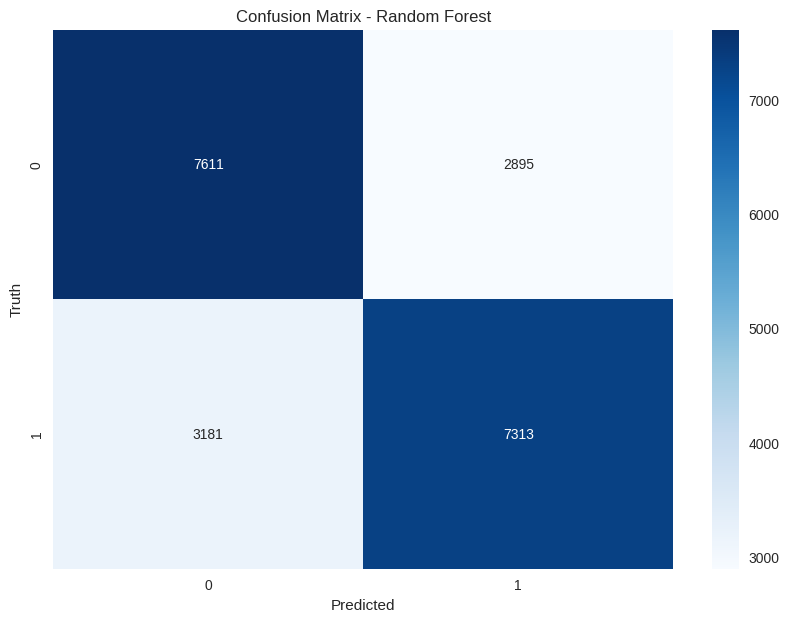

Accuracy: 0.7107
Precision: 0.7164
Recall: 0.6969
F1-Score: 0.7065
ROC AUC: 0.7728

Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.72      0.71     10506
           1       0.72      0.70      0.71     10494

    accuracy                           0.71     21000
   macro avg       0.71      0.71      0.71     21000
weighted avg       0.71      0.71      0.71     21000


Evaluating Gaussian Naive Bayes


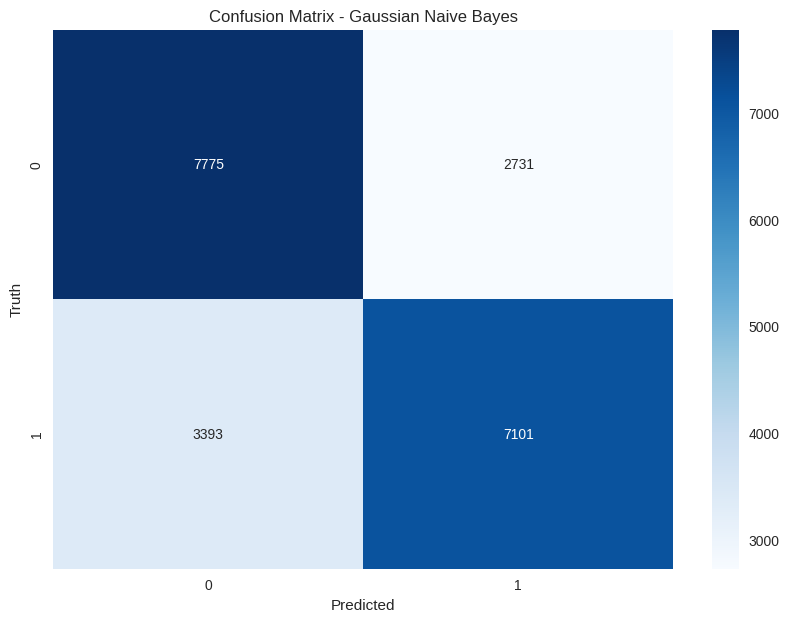

Accuracy: 0.7084
Precision: 0.7222
Recall: 0.6767
F1-Score: 0.6987
ROC AUC: 0.7631

Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.74      0.72     10506
           1       0.72      0.68      0.70     10494

    accuracy                           0.71     21000
   macro avg       0.71      0.71      0.71     21000
weighted avg       0.71      0.71      0.71     21000


Evaluating Gradient Boosting


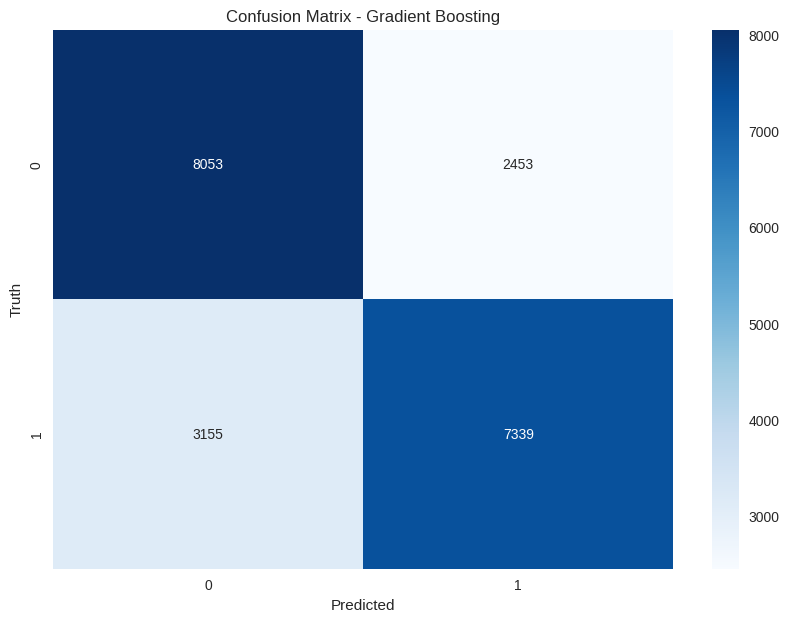

Accuracy: 0.7330
Precision: 0.7495
Recall: 0.6994
F1-Score: 0.7236
ROC AUC: 0.7992

Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.77      0.74     10506
           1       0.75      0.70      0.72     10494

    accuracy                           0.73     21000
   macro avg       0.73      0.73      0.73     21000
weighted avg       0.73      0.73      0.73     21000


Evaluating K-Nearest Neighbors


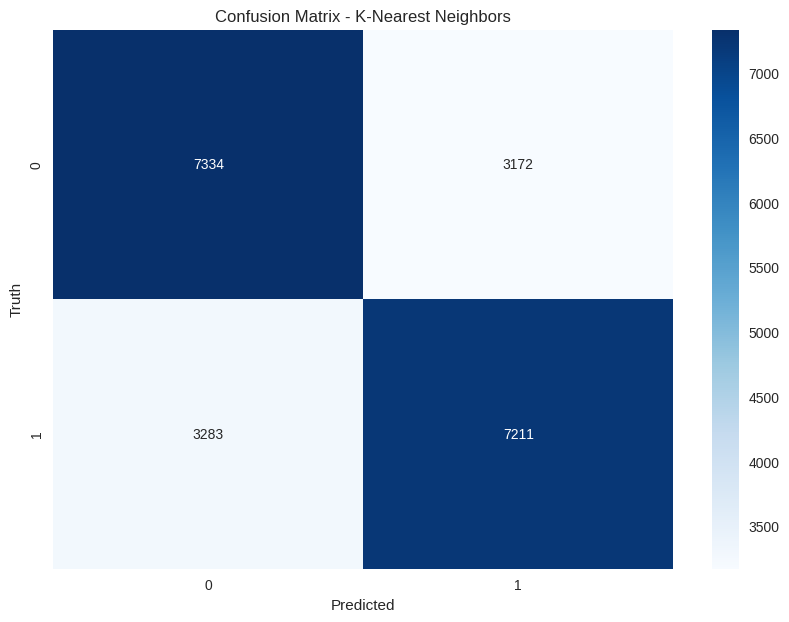

Accuracy: 0.6926
Precision: 0.6945
Recall: 0.6872
F1-Score: 0.6908
ROC AUC: 0.7415

Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.70      0.69     10506
           1       0.69      0.69      0.69     10494

    accuracy                           0.69     21000
   macro avg       0.69      0.69      0.69     21000
weighted avg       0.69      0.69      0.69     21000


Evaluating Logistic Regression


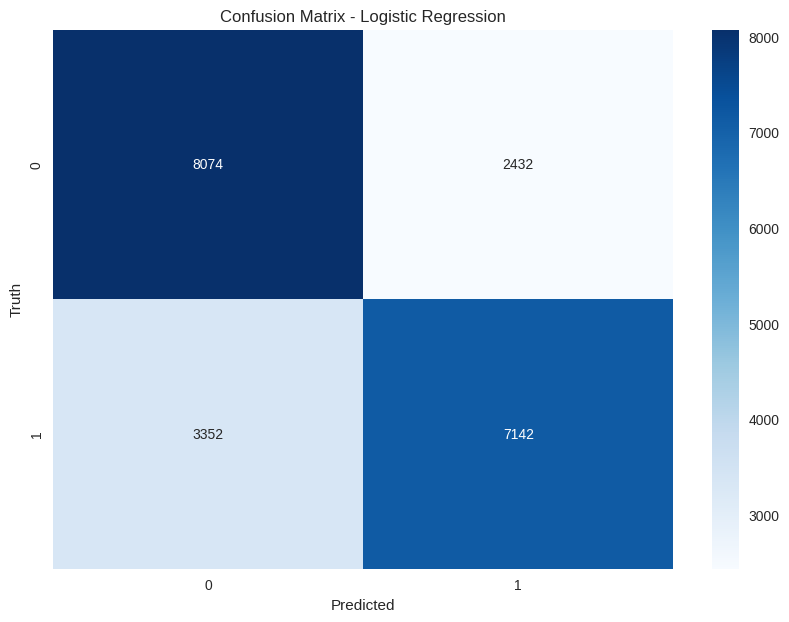

Accuracy: 0.7246
Precision: 0.7460
Recall: 0.6806
F1-Score: 0.7118
ROC AUC: 0.7883

Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.77      0.74     10506
           1       0.75      0.68      0.71     10494

    accuracy                           0.72     21000
   macro avg       0.73      0.72      0.72     21000
weighted avg       0.73      0.72      0.72     21000


Evaluating Support Vector Machine


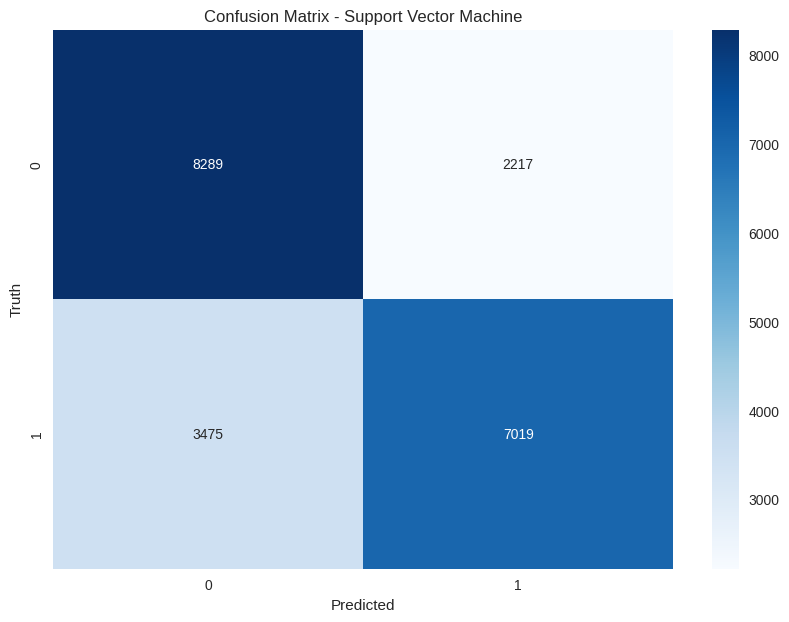

Accuracy: 0.7290
Precision: 0.7600
Recall: 0.6689
F1-Score: 0.7115
ROC AUC: 0.7840

Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.79      0.74     10506
           1       0.76      0.67      0.71     10494

    accuracy                           0.73     21000
   macro avg       0.73      0.73      0.73     21000
weighted avg       0.73      0.73      0.73     21000


Evaluating XGBoost


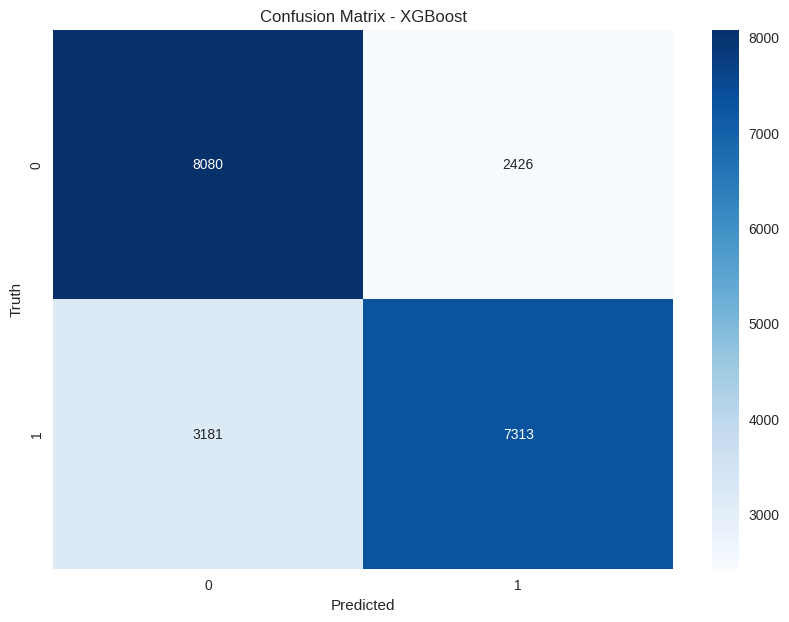

Accuracy: 0.7330
Precision: 0.7509
Recall: 0.6969
F1-Score: 0.7229
ROC AUC: 0.7984

Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.77      0.74     10506
           1       0.75      0.70      0.72     10494

    accuracy                           0.73     21000
   macro avg       0.73      0.73      0.73     21000
weighted avg       0.73      0.73      0.73     21000


Model Performance Comparison:
                        accuracy  precision    recall  f1_score   roc_auc
Gradient Boosting       0.732952   0.749489  0.699352  0.723553  0.799246
XGBoost                 0.733000   0.750898  0.696874  0.722878  0.798432
Logistic Regression     0.724571   0.745979  0.680579  0.711780  0.788349
Support Vector Machine  0.728952   0.759961  0.668858  0.711505  0.783970
Random Forest           0.710667   0.716399  0.696874  0.706502  0.772795
Gaussian Naive Bayes    0.708381   0.722234  0.676672  0.698711  0.763082
K-Nearest Neighbo

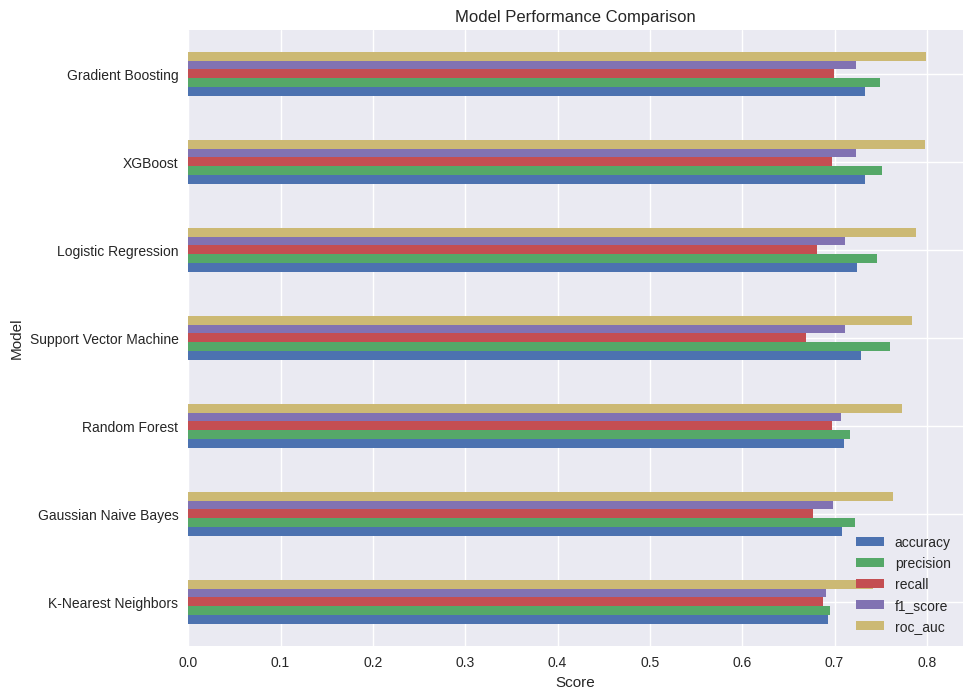

In [65]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics as sm
from sklearn.metrics import classification_report

# Dictionary of trained models
models = {
    'Random Forest': forest,
    'Gaussian Naive Bayes': gnb,
    'Gradient Boosting': gbc,
    'K-Nearest Neighbors': knn,
    'Logistic Regression': log_reg,
    'Support Vector Machine': svc,
    'XGBoost': xgb_model,

}

# Dictionary to store evaluation metrics
evaluation_results = {}

for name, model in models.items():
    print(f"\n{'='*50}")
    print(f"Evaluating {name}")
    print(f"{'='*50}")
    
    # Make predictions
    y_pred = model.predict(X_test_scaled)
    y_proba = model.predict_proba(X_test_scaled)[:, 1] if hasattr(model, 'predict_proba') else None
    
    # Calculate metrics
    conf_matrix = sm.confusion_matrix(y_test, y_pred)
    accuracy = sm.accuracy_score(y_test, y_pred)
    precision = sm.precision_score(y_test, y_pred)
    recall = sm.recall_score(y_test, y_pred)
    f1 = sm.f1_score(y_test, y_pred)
    roc_auc = sm.roc_auc_score(y_test, y_proba) if y_proba is not None else None
    
    # Store results
    evaluation_results[name] = {
        'confusion_matrix': conf_matrix,
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1,
        'roc_auc': roc_auc
    }
    
    # Visualization
    plt.figure(figsize=(10, 7))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Truth')
    plt.show()
    
    # Print metrics
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    if roc_auc is not None:
        print(f"ROC AUC: {roc_auc:.4f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

# Optional: Create a comparison DataFrame
import pandas as pd
metrics_df = pd.DataFrame.from_dict(evaluation_results, orient='index')
metrics_df = metrics_df[['accuracy', 'precision', 'recall', 'f1_score', 'roc_auc']]
print("\nModel Performance Comparison:")
print(metrics_df.sort_values('roc_auc', ascending=False))

# Optional: Plot metrics comparison
metrics_df.sort_values('roc_auc', ascending=True).plot(kind='barh', figsize=(10, 8))
plt.title('Model Performance Comparison')
plt.xlabel('Score')
plt.ylabel('Model')
plt.show()

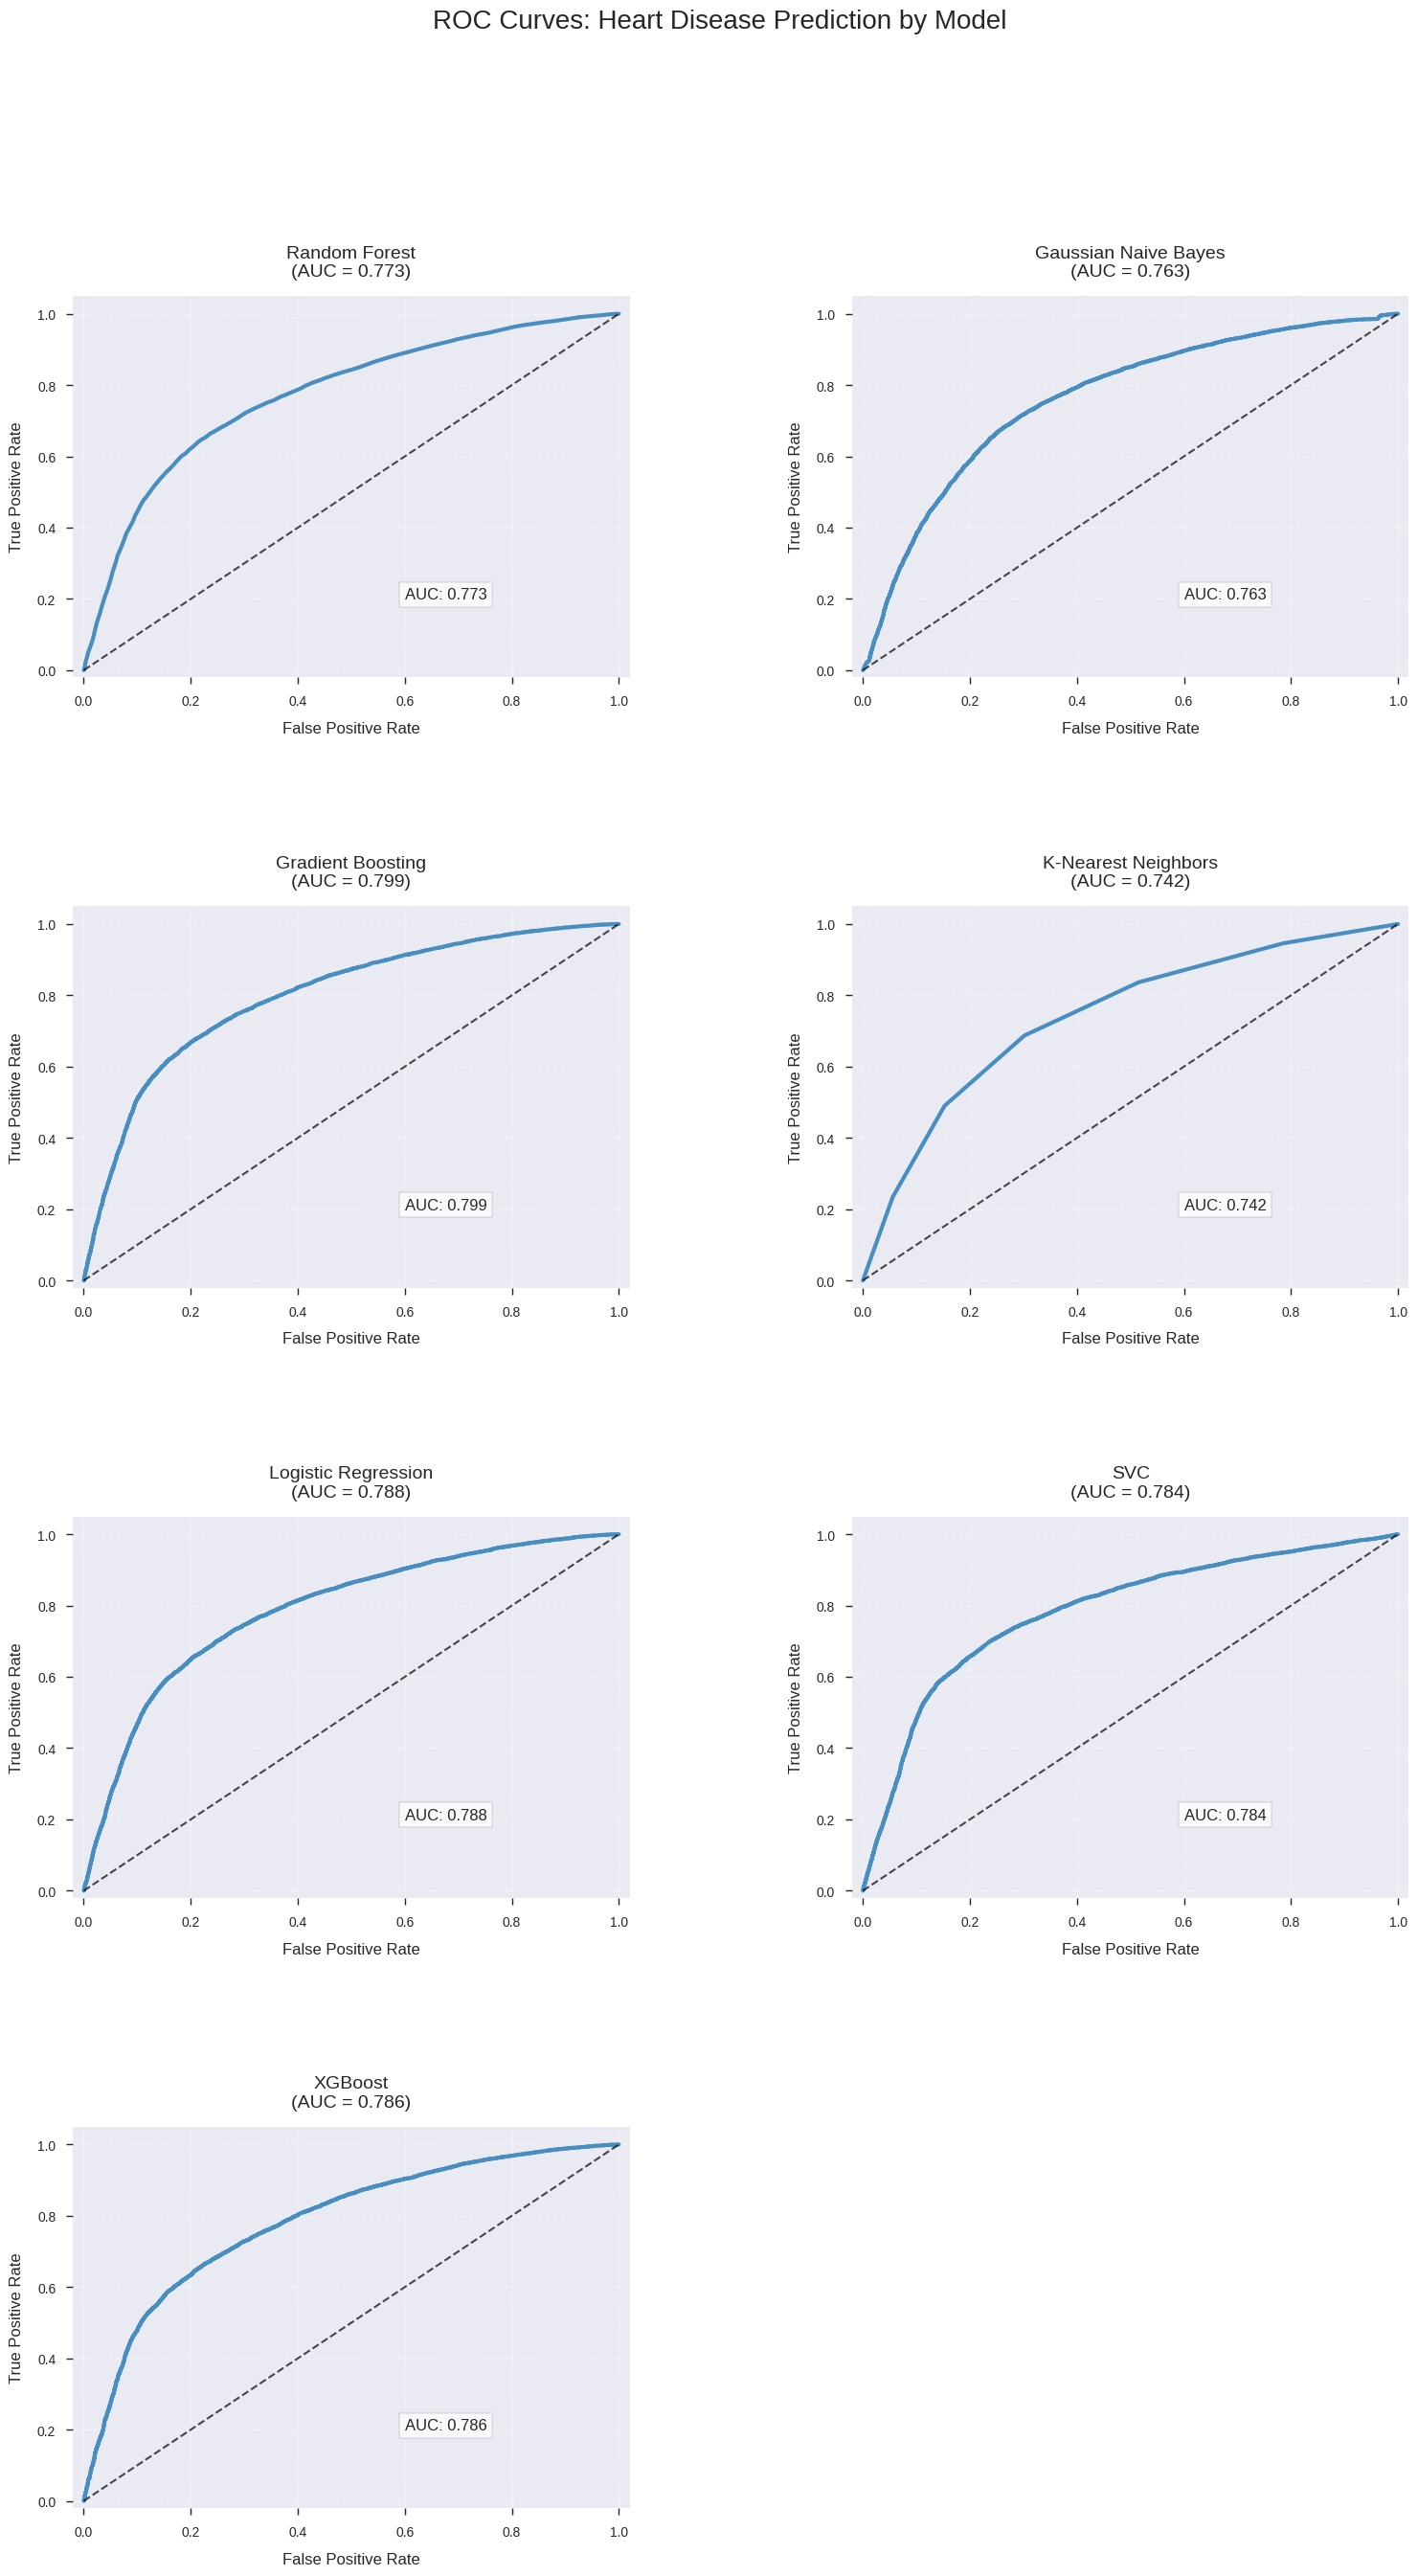

In [66]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Define models and labels
models = [forest, gnb, gbc, knn, log_reg, svc, xgb_model]
labels = ['Random Forest', 'Gaussian Naive Bayes', 'Gradient Boosting', 
          'K-Nearest Neighbors', 'Logistic Regression', 'SVC', 'XGBoost']

# Create figure with more spacing
fig = plt.figure(figsize=(18, 30))  # Larger figure size
fig.suptitle('ROC Curves: Heart Disease Prediction by Model', fontsize=20, y=0.98)

# Custom grid layout with more spacing
grid = plt.GridSpec(4, 2, wspace=0.4, hspace=0.6)  # Increased spacing

# Plot each model separately with more space
for idx, (model, label) in enumerate(zip(models, labels)):
    # Create subplot in custom grid position
    ax = plt.subplot(grid[idx])
    
    # Select appropriate test data
    X_eval = X_test if model in [forest, gnb, gbc, xgb_model, cat_model] else X_test_scaled
    
    # Get predicted probabilities
    try:
        y_pred_prob = model.predict_proba(X_eval)[:, 1]
    except AttributeError:
        y_pred_prob = model.decision_function(X_eval)
        y_pred_prob = (y_pred_prob - y_pred_prob.min()) / (y_pred_prob.max() - y_pred_prob.min())
    
    # Calculate ROC curve and AUC
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    auc = roc_auc_score(y_test, y_pred_prob)
    
    # Plot ROC curve
    ax.plot(fpr, tpr, color='#1f77b4', lw=3, alpha=0.8)
    ax.plot([0, 1], [0, 1], 'k--', lw=1.5, alpha=0.7)
    ax.set_xlim([-0.02, 1.02])
    ax.set_ylim([-0.02, 1.05])
    ax.set_xlabel('False Positive Rate', fontsize=12, labelpad=10)
    ax.set_ylabel('True Positive Rate', fontsize=12, labelpad=10)
    ax.set_title(f'{label}\n(AUC = {auc:.3f})', fontsize=14, pad=15)
    ax.grid(True, linestyle='--', alpha=0.4)
    
    # Add AUC score inside plot
    ax.text(0.6, 0.2, f'AUC: {auc:.3f}', fontsize=12, 
            bbox=dict(facecolor='white', alpha=0.8, edgecolor='gray'))
    
    # Customize spines and ticks
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.tick_params(axis='both', which='both', length=5, pad=8)

plt.tight_layout()
plt.show()